In [46]:
import pandas as pd
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("autompg.csv")

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
missing_values = [ "?"]
df = pd.read_csv("autompg.csv", na_values = missing_values)

In [5]:
df.isnull().sum()
#missing value present in horsepower

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [6]:
#lets remove missing values
df['horsepower'].fillna(df['horsepower'].mean(),inplace=True)

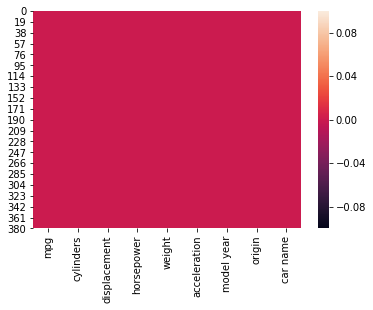

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [9]:
df.shape

(398, 9)

In [10]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [11]:
df['model year'].value_counts()

73    40
78    36
76    34
82    31
75    30
81    29
80    29
79    29
70    29
77    28
72    28
71    28
74    27
Name: model year, dtype: int64

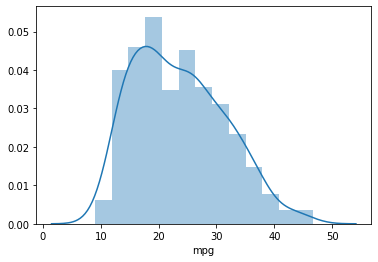

In [12]:
sns.distplot(df['mpg'])
# value lies btw 10 to 40

In [13]:
print("Skewness: %f" % df['mpg'].skew())


Skewness: 0.457066


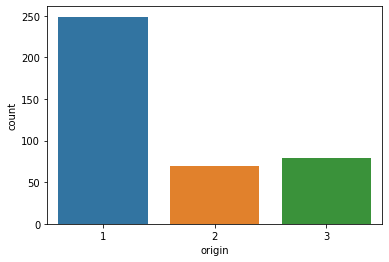

In [14]:
sns.countplot(df.origin)
#here US = 1, Asia = 2, Europe = 3 so us has most cars produced

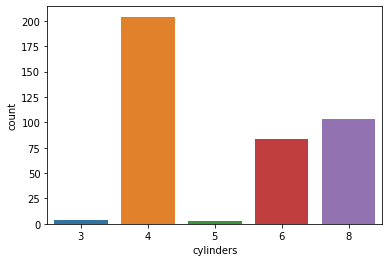

In [15]:
sns.countplot(df.cylinders)
#4 cylinder cars are popular

In [16]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [17]:
pd.crosstab(df['car name'],df['model year'])

model year,70,71,72,73,74,75,76,77,78,79,80,81,82
car name,,,,,,,,,,,,,
amc ambassador brougham,0,0,0,1,0,0,0,0,0,0,0,0,0
amc ambassador dpl,1,0,0,0,0,0,0,0,0,0,0,0,0
amc ambassador sst,0,0,1,0,0,0,0,0,0,0,0,0,0
amc concord,0,0,0,0,0,0,0,0,1,0,1,0,0
amc concord d/l,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
vw dasher (diesel),0,0,0,0,0,0,0,0,0,0,1,0,0
vw pickup,0,0,0,0,0,0,0,0,0,0,0,0,1
vw rabbit,0,0,0,0,0,0,1,0,0,0,1,0,0


In [18]:
df.groupby('origin')['horsepower'].mean()

origin
1    118.814769
2     81.241983
3     79.835443
Name: horsepower, dtype: float64

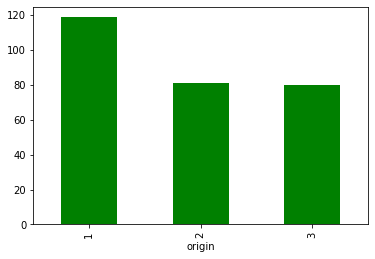

In [19]:
df.groupby('origin')['horsepower'].mean().plot.bar(color="green")
#american cars have highest horse power

In [20]:
df.groupby('model year')['mpg'].mean()

model year
70    17.689655
71    21.250000
72    18.714286
73    17.100000
74    22.703704
75    20.266667
76    21.573529
77    23.375000
78    24.061111
79    25.093103
80    33.696552
81    30.334483
82    31.709677
Name: mpg, dtype: float64

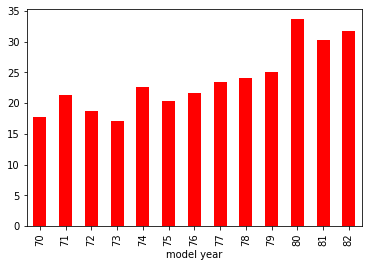

In [21]:
df.groupby('model year')['mpg'].mean().plot.bar(color="red")
#in the year 80 cars has travelled  highest mpg (miles per gallon)

In [22]:
df.corr()
#cylinders,displacement,horsepower,weight have negative correlation nd others factors have positive correlation that is a direct relationship 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


In [23]:
dfcor=df.corr()

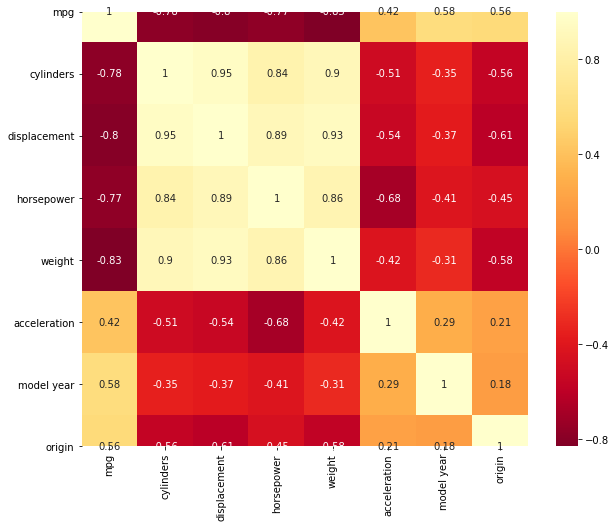

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

In [25]:
df.corr().mpg.sort_values(ascending=False) 

mpg             1.000000
model year      0.579267
origin          0.563450
acceleration    0.420289
horsepower     -0.771437
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64

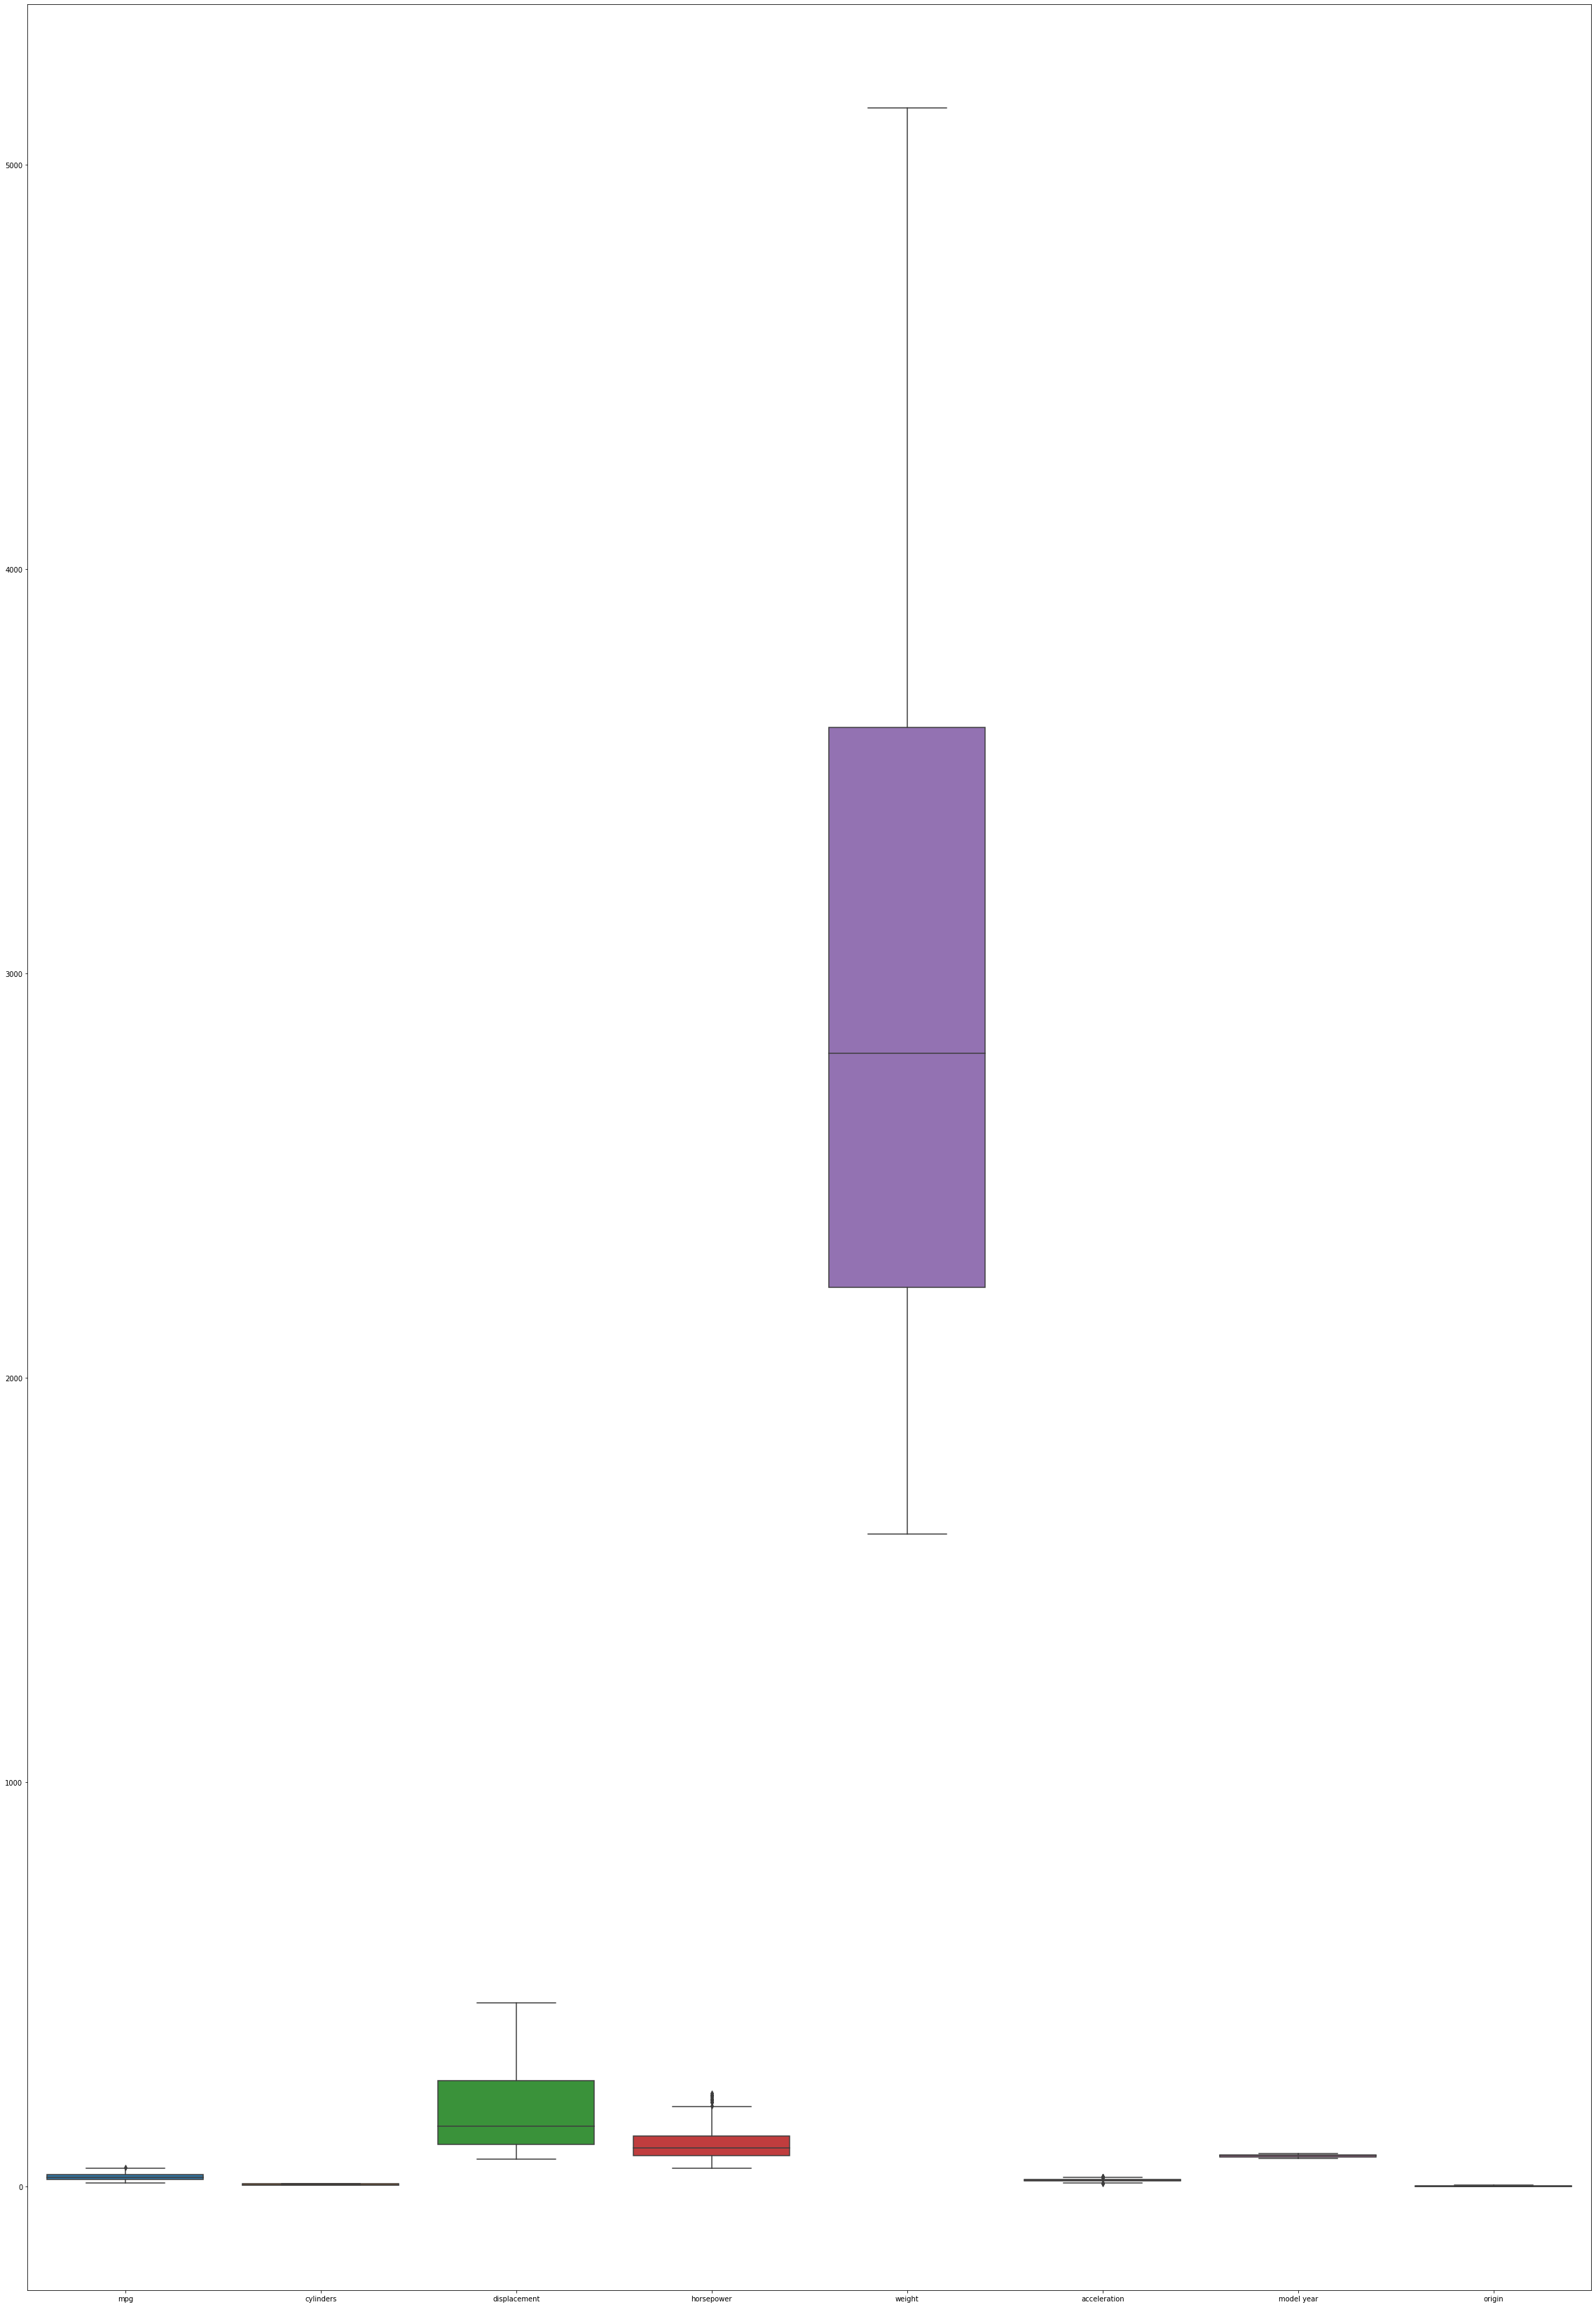

In [26]:
plt.figure(figsize = (40,60))
sns.boxplot(data=df)
#no major outliers present howewer thare are few  in horsepower lets normalise the data

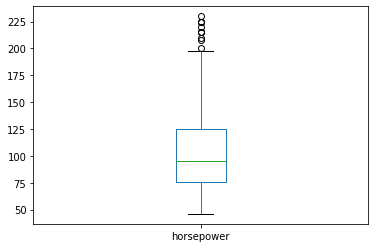

In [27]:
df['horsepower'].plot.box()

In [28]:
df.loc[df['horsepower']>200,'']=np.mean(df['horsepower'])

In [29]:
#lets preapre our model for training nd testing
columns_target=['mpg']
columns_train=['cylinders','displacement','horsepower','weight','acceleration','model year','origin']
x=df[columns_train]
y=df[columns_target]

In [30]:
x = StandardScaler().fit_transform(x)

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.21,random_state=51)

In [32]:
x_train.shape

(314, 7)

In [33]:
y_train.shape

(314, 1)

In [34]:
x_test.shape

(84, 7)

In [35]:
y_test.shape

(84, 1)

In [36]:
lr=LinearRegression()

In [37]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.33,random_state=702)
x_train.shape[0] == y_train.shape[0]

True

In [106]:
lr.score(x_train,y_train)

0.7949357782212974

In [107]:
pred=lr.predict(x_test)
print("Predicted MPG:",pred)
print("actual MPG",y_test)

Predicted MPG: [[ 7.63996207]
 [20.56766475]
 [20.4214098 ]
 [12.03524881]
 [33.22139486]
 [10.28343354]
 [32.13810423]
 [36.5238783 ]
 [30.06057113]
 [30.01099074]
 [19.72154083]
 [29.67954914]
 [17.39264921]
 [26.49399955]
 [24.7043418 ]
 [21.47421227]
 [33.69800536]
 [25.12154438]
 [17.28530157]
 [20.54660132]
 [21.11567458]
 [29.11015601]
 [28.55070969]
 [32.27883781]
 [ 6.70500225]
 [30.94149086]
 [35.84962966]
 [12.05835854]
 [29.7664187 ]
 [21.95843332]
 [30.56449616]
 [36.67166531]
 [31.23667605]
 [32.0736228 ]
 [17.70436013]
 [25.22212486]
 [30.54616576]
 [25.56151156]
 [32.2291327 ]
 [28.92031559]
 [28.74269851]
 [31.12470595]
 [19.6762982 ]
 [21.36891659]
 [11.4095055 ]
 [17.56108521]
 [26.05900432]
 [30.41300316]
 [26.20615346]
 [22.71755889]
 [26.29213322]
 [20.56508862]
 [13.60873184]
 [31.37524302]
 [15.04643176]
 [21.57627235]
 [24.18691117]
 [20.5351612 ]
 [16.33231746]
 [12.88678618]
 [19.85325702]
 [20.42605143]
 [26.01467711]
 [29.26651656]
 [26.43658126]
 [24.41465

In [108]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.8704174317317563


In [104]:
from sklearn import linear_model
max_r_score=0
for r_state in range(42,800):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.33)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)        

max r2 score corresponding to  702  is  0.8680284982809825


In [54]:
lr_scores = cross_val_score(lr,x,y,
                               scoring="neg_mean_squared_error", cv=10)

In [60]:
lr_rmse_scores = np.sqrt(-lr_scores)

In [91]:
print("Mean:\t\t ", lr_rmse_scores.mean(), "\nStandard Deviation:", lr_rmse_scores.std())

Mean:		  3.4624267738251087 
Standard Deviation: 0.9580975531209532


In [74]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [75]:
r2_score(tree_reg.predict(x_train),y_train)

1.0

In [76]:
r2_score(tree_reg.predict(x_test),y_test)

0.7906943828986441

In [77]:
from sklearn.neighbors import KNeighborsRegressor

In [78]:
knn = KNeighborsRegressor(n_neighbors=3)

In [80]:

knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [81]:
r2_score(knn_reg.predict(x_train),y_train)

0.8844380950330195

In [82]:
r2_score(knn_reg.predict(x_test),y_test)

0.8327814774070008

In [109]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso()
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))

0.7596430487540339


In [110]:
from sklearn.model_selection import GridSearchCV
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x,y)
print(grid)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0
{'alpha': 0}


In [111]:
rd=Ridge(alpha=0)
rd.fit(x,y)
print(rd.coef_)
print(rd.score(x_test,y_test))

[[-0.710559    1.96687316 -0.43435854 -5.68248814  0.28264069  2.7946801
   1.13549611]]
0.8725417200826735


In [88]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [89]:
r2_score(forest_reg.predict(x_train),y_train)

0.9768140426237439

In [90]:
r2_score(forest_reg.predict(x_test),y_test)

0.9817444371849982

In [92]:
forest_scores = cross_val_score(forest_reg,x,y,
                               scoring="neg_mean_squared_error", cv=10)

In [93]:
forest_rmse_scores = np.sqrt(-forest_scores)

In [94]:
print("Mean:\t\t ", forest_rmse_scores.mean(), "\nStandard Deviation:", forest_rmse_scores.std())

Mean:		  2.9478488623027514 
Standard Deviation: 0.9614240915112957


In [ ]:
#random forest regressor works best with 98 accuracy

In [112]:
from sklearn.externals import joblib
joblib.dump(forest_reg,'forest_regmpg.obj')
forest_reg_from_joblib=joblib.load('forest_regmpg.obj')